# BEEM011 Assignment December 2022

CANDIDATE NUMBER  257454

### Instructions

#### Summative assessment
Direction: This Assignment consists of 3 questions. There are 100 marks in total. 

For each question, 5% of marks are reserved for evidence of best practice in R coding, marks for sub-questions therefore add up to 95% of the total marks for each question.

Answer all the questions and upload your Jupyter Notebook and a PDF copy to the BART submission point. 

#### WRITE YOUR R CODE AND ANSWERS FOR ALL OF THE QUESTIONS IN THIS JUPYTER NOTEBOOK.  PLEASE INCLUDE YOUR CANDIDATE NUMBER IN A COMMENT AT THE TOP OF YOUR CODE.


#### DO NOT PUT YOUR NAME ANYWHERE IN THE ASSIGNMENT.


Make sure to include your Jupyter Notebook file (.ipynb) as an upload to your submission. Please comment on each procedure to explain what you are doing (or intend to do). Submission is via BART.
Submission of an incorrect filetype will result in the deduction of marks.

Read and answer each of the questions using your own code and words.  

Collaboration with others and plagiarism of other people's code is not permitted. Presenting someone else's code as your own work is misrepresentation, an academic conduct offence.


#### Download the "investCEO.csv" dataset and save it in your BEEM011 folder

### The Data

This assignment takes inspiration from the work of Malmendier and Tate (2005) who analyzed Corporate Investment and CEO overconfidence.  The objective was to understand whether managerial overconfidence is a determinant of corporate investment distortions.

"Overconfident managers overestimate the returns to their investment projects and view external funds as unduly costly. Thus, they overinvest when they have abundant internal funds, but curtail investment when they require external financing." - Malmendier and Tate (2005, abstract)

Malmendier and Tate tested their "overconfidence hypothesis", that the investment of overconfident CEOs would be more responsive to cash flow than that of non-overconfident CEOs.  To do this they constructed a panel data set of the personal portfolio and corporate investment decisions of Forbes 500 CEOs. They classified CEOs as overconfident if they persistently fail to reduce their personal exposure to company-specific risk. 

In this assignment you will test the overconfidence hypothesis using a different set of data.  The variables included in the dataset are:


* *year* <ul> Year of the observation </ul>

* *firmid*  <ul> A firm specific identifier </ul>

* *I* <ul> Investment (%), defined as firm capital expenditures as a percentage of capital at the beginning of the year </ul>

* *CF*  <ul> Cash flow, defined as earnings before extraordinary items plus depreciation as a percentage of capital at the beginning of the year </ul>

* *MV* <ul> Market value of assets over book value of assets at the beginning of the year (%) </ul>

* *S* <ul> Percentage of total shares owned by CEO or CEO's family (%)</ul>

* *size* <ul> Logarithm of assets (£) at the beginning of the year </ul>

* *CG* <ul> Number of outside directors who are CEOs in other companies </ul>

* *TC* <ul> Press based overconfidence measure, the number of articles mentioning CEO as "confident" or "optimistic" </ul>

* *TD* <ul> A dummy variable equal to 1 if the majority of articles portrayed confidence and 0 otherwise </ul>


#### References

Malmendier, U., & Tate, G. (2005a). CEO overconfidence and corporate investment. The journal of Finance, 60(6), 2661-2700.

Malmendier, U., & Tate, G. (2005b). Does overconfidence affect corporate investment? CEO overconfidence measures revisited. European Financial Management, 11(5), 649-659.

In [12]:
library(lmtest)
library(stargazer) 
library(MASS)
library(stargazer)
library(plm)
library(ggplot2)
library(car)
library(margins)
# Set plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=4)

Warning message:
"package 'margins' was built under R version 3.6.3"

## Question 1 - Exploring the data

### a i)

Load the data and store it in an object called "CEOdata" (2 marks)

In [2]:
CEOdata <- read.csv("investCEO.csv",row.name=1)
head(CEOdata)

X,I,year,firmid,CF,MV,S,size,CG,TC,TD
1,43.819809,2014,1,38.707367,-0.6243080,51.53569,15.34471,4,58.37659,0
2,8.607709,2015,1,6.953518,-0.6198200,53.08951,14.70605,3,54.91905,0
3,33.864362,2016,1,29.062855,-0.9727826,53.70401,14.97030,2,61.67488,0
4,52.473835,2017,1,39.714721,-1.7624451,53.63398,15.41372,2,58.71316,0
5,40.123265,2018,1,37.088101,-1.4425642,52.54098,14.22295,2,56.21433,0
6,8.304938,2019,1,5.264080,-1.9769940,52.90180,14.54670,2,57.69962,0


### ii) 

Explore the data -
- What time period does it cover?
- How many firms are included in the dataset?
- How many observations are in the dataset?
- Is the dataset balanced?

(3 marks)

In [3]:
# Provide your code here
# What time period does it cover?
year.range <- range(CEOdata$year)
year.range
cat("\n Number of years:", length(unique(CEOdata$year)))

#How many firms are included in the dataset?
cat("\n Number of firms:", length(unique(CEOdata$firmid)))

# How many observations are in the dataset?
length(CEOdata$firmid)

#Is the dataset balanced? 
is.pbalanced(CEOdata, index = c( "year","firmid"))

[1] 2014 2021


 Number of years: 8
 Number of firms: 80

[1] 640

[1] TRUE

#### Provide your answer here 

- What time period does it cover?
 8 years
- How many firms are included in the dataset?
The dataset contains data from 80 firms
- How many observations are in the dataset?
 The dataset contains 640 observations
- Is the dataset balanced?
 True

### iii) 

Plot a histogram of Investment, $I_{it}$, and describe its distribution (5 marks)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -4.686  13.062  21.954  23.243  33.063  61.174 

[1] 23.24258

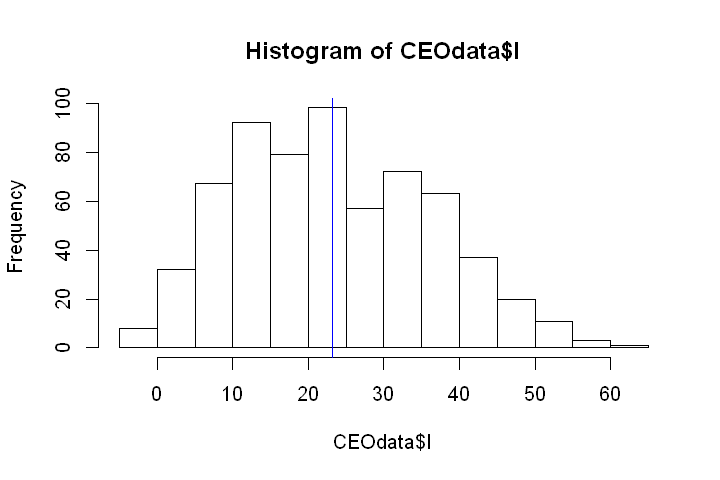

In [4]:
# Provide your code here
hist(CEOdata$I)

mean_I <- mean(CEOdata$I)
summary(CEOdata$I)
mean_I 

abline(v = mean_I, col = 'blue')

#### Provide your answer here 
The histogram shows a high shape in the middle and low in the sides, but the middle part shows multimodal, indicating that I is basically distributed in the range of 13.062-33.063, with a mean value of 23.24.

## b i)

- Set the seed to your candidate number (1 mark)
- Randomly choose a one year time period from the dataset, save the randomly selected time period as indext. Report the value of indext (1.5 marks)
- Create a subset of the dataset for your chosen time period. Label your new dataset as mydata. (1.5 marks)

In [5]:
# Provide your code here 
set.seed(257454)

indext <- sample(2014:2021, size = 1)

indext

mydata <- subset(CEOdata,CEOdata$year==indext)
nrow(mydata)
head(mydata)

[1] 2015

[1] 80

,X,I,year,firmid,CF,MV,S,size,CG,TC,TD
2,2,8.607709,2015,1,6.953518,-0.619820,53.08951,14.70605,3,54.91905,0
10,10,23.988174,2015,2,35.846055,6.875068,55.48489,15.26616,9,67.02083,0
18,18,33.292961,2015,3,29.171818,-1.509708,71.37975,15.45963,1,92.95555,1
26,26,29.994347,2015,4,30.846439,6.078643,56.66965,15.04939,1,20.80286,0
34,34,11.065406,2015,5,7.427105,3.807085,28.01592,15.08492,5,105.83526,0
42,42,5.334032,2015,6,4.831380,-1.678691,49.63324,14.00852,0,95.85844,0


### b ii) 

### Use the subset, mydata, to answer the remaining parts of Q1

- Plot the distribution of Investment, $I_{i}$, for CEOs with media portrayal classified as overconfident, i.e. $TD_i = 1$, and those who are not.  Label your plots carefully (4 marks)

[1] 10

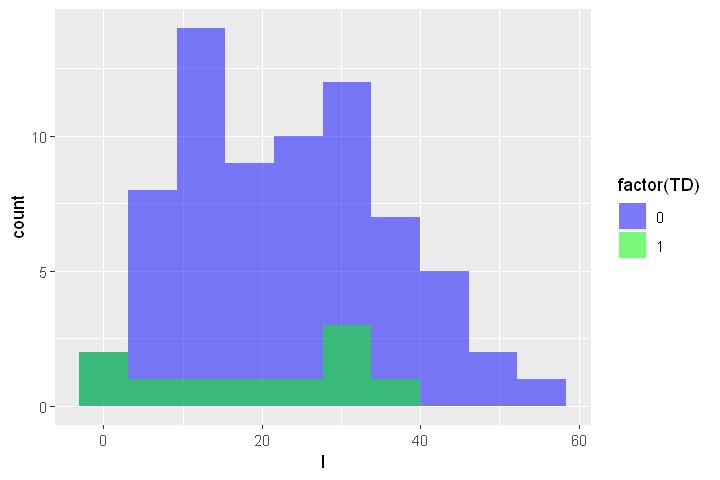

[1] 19.7625

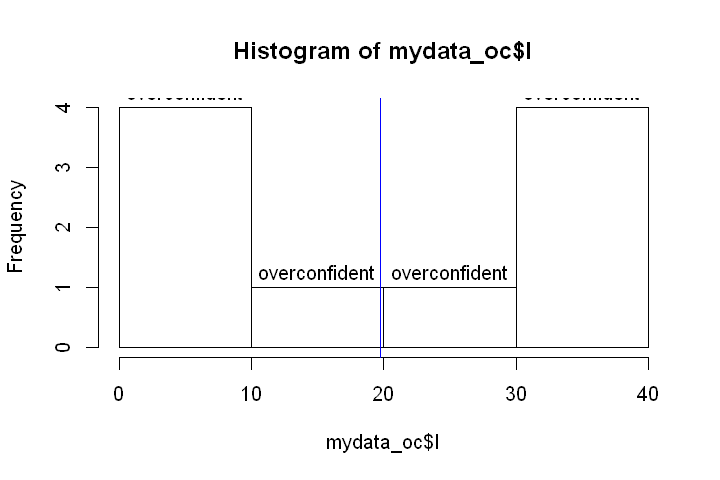

[1] 23.29638

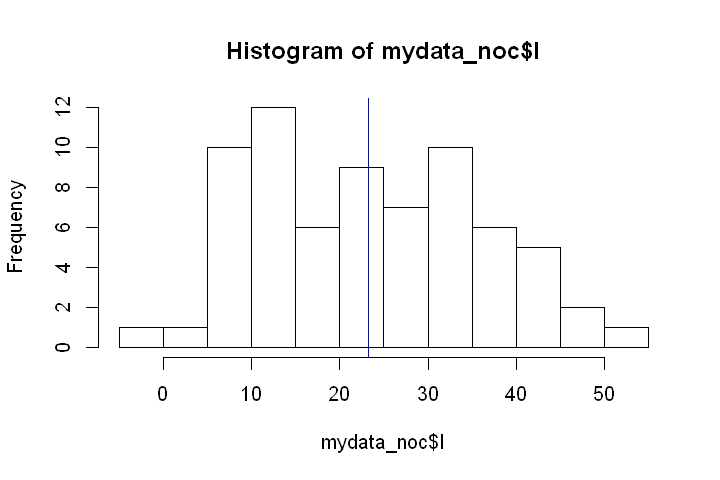

In [6]:
# Provide your code here
ggplot(mydata, aes(x=I, fill=factor(TD))) +
  geom_histogram(stat="bin",position="identity", bins=10, alpha=0.5) +
  scale_fill_manual(values=c("blue", "green"))

mydata_oc <- subset(mydata,mydata$TD==1)
nrow(mydata_oc)
hist(mydata_oc$I , labels = "overconfident")
mydata_oc_mean_I <- mean(mydata_oc$I)
mydata_oc_mean_I
abline(v = mydata_oc_mean_I, col = 'blue')

mydata_noc <- subset(mydata,mydata$TD==0)
hist(mydata_noc$I)
mydata_noc_mean_I <- mean(mydata_noc$I)
mydata_noc_mean_I
abline(v = mydata_noc_mean_I, col = 'blue')


- Compare and describe the two plots (4 marks)

#### Write your answers here
-The first graph contains TD=1 (green) and TD=0 (blue). The randomly selected data is the full year 2015 dataset with 10 overconfident CEOs and 70 non-overconfident CEOs, for a total of 80. The second graph is a histogram of company capital expenditure as a percentage of beginning capital for overconfident CEOs, the histogram shows a low centre and high sides with a mean of 19.76%, due to the small amount of data with only 10, the small amount of data leads to a low confidence level.
The third graph is a histogram of non-overconfident CEOs, the histogram shows the presence of a double peak indicating that the data is from a different CEO with a mean value of 23.30%.
Comparing these two histograms it can be concluded that in 2015, the overconfident CEOs started the year with a smaller percentage of their company's capital expenditure as a percentage of capital, as well as a more even distribution.


## c i)

Consider the following regression equation:

$$ I_i = β_0+ β_1 CF_i + β_2 size_i + β_3 MV_i + β_4 CG_i + β_5 TD_i + β_6 (CF_i × TD_i ) + u_i $$

Describe the effect of TD in this model specification (3 marks)

#### Write your answer here
β_5 adds the introduction of the dummy variable TD, which only changes the intercept and has no effect on the slope. β6 is a multiplication of the dummy variable TD with the continuous variable CF, with a possible change in both slope and intercept, with the aim of introducing overconfident and non-overconfident CEOs and the effect of cash flow on I. The effect of different attribute types on I is tested.
Whether the CEO is overconfident is introduced in both additive and multiplicative ways, and then a t-test is used to determine the final introduction.

## c ii)

Estimate the regression equation using your subset, mydata.

- Interpret the results of your estimation (5 marks)

- Based on the estimated parameters, write the two regression functions for the cases where TD is 1 and 0. (4 marks)

In [7]:
reg1 <- lm(I ~ CF + size + MV + CG + TD + CF:TD , data = mydata)
coef(reg1)
summary(reg1)

(Intercept)           CF         size           MV           CG           TD 
35.975601499  0.974414856 -1.986447468  0.005249225 -0.988054473 -9.639831764 
       CF:TD 
 0.316514044


Call:
lm(formula = I ~ CF + size + MV + CG + TD + CF:TD, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4657  -3.7169   0.5684   3.8081  13.6878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.975601  20.131763   1.787   0.0781 .  
CF           0.974415   0.058869  16.552  < 2e-16 ***
size        -1.986447   1.358563  -1.462   0.1480    
MV           0.005249   0.128391   0.041   0.9675    
CG          -0.988054   0.234815  -4.208 7.24e-05 ***
TD          -9.639832   4.651081  -2.073   0.0417 *  
CF:TD        0.316514   0.218107   1.451   0.1510    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.484 on 73 degrees of freedom
Multiple R-squared:  0.8327,	Adjusted R-squared:  0.819 
F-statistic: 60.56 on 6 and 73 DF,  p-value: < 2.2e-16


#### Write your answer here
TD = 1
$$ I_i = 35.975601 +  0.974415 CF_i -1.986447 size_i + 0.005249 MV_i -0.988054 CG_i -9.639832 TD_i + 0.316514(CF_i × TD_i ) $$

TD = 0
$$ I_i = 35.975601 +  0.974415 CF_i -1.986447 size_i +  0.005249 MV_i -0.988054 CG_i $$

The Residuals section shows the minimum, first quartile, median, third quartile, and maximum values of the residuals, which are the differences between the observed values of the dependent variable and the values predicted by the model.
The analysis of the multiple regression equation for the overconfident CEO is as follows. The CF,CG and TD of the model are significantly non-zero at p<0.5, indicating that the effect of these variables on I is valid, and the Adjusted R-squared is 0.819, which is a better fit level than the mean model. All else being equal, for every 1 unit increase in CF, I increases by 0.97% and for every 1 unit increase in CG, I decreases by 0.99. The variable CF has a positive coefficient, indicating that higher cash flow is associated with higher investment. On the other hand, the variable CG has a negative coefficient, indicating that a higher number of outside directors who are CEOs in other companies is associated with lower investment.MV and size did not pass the significance test and these two variables could be considered for exclusion from the model. All else being equal the overconfident CEO's I is 9.64% less than the other CEO's. The F-test, which is used to determine the significance test of the equation as a whole, The p-value of the F-test is less than 0.05 and we can assume that the equation passes the significance test at the p=0.05 level.


## c iii)

- Evaluate whether the regression equation for CEOs portrayed as overconfident ($TD_i = 1$) is statistically significantly different to the regression equation for non-overconfident CEOs.  Discuss your method and conclusion. (4 marks)

In [8]:
# Provide your code here

se_reg1 <- sqrt(diag(vcovHC(reg1, type="HC1")))
coeftest(reg1, vcov. = vcovHC, type = "HC1")



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 35.9756015 21.9011696  1.6426 0.1047598    
CF           0.9744149  0.0599582 16.2516 < 2.2e-16 ***
size        -1.9864475  1.4793630 -1.3428 0.1835062    
MV           0.0052492  0.1266435  0.0414 0.9670513    
CG          -0.9880545  0.2567124 -3.8489 0.0002521 ***
TD          -9.6398318  7.2528646 -1.3291 0.1879519    
CF:TD        0.3165140  0.2953067  1.0718 0.2873340    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### Write your answer here
​The model is assessed using a method that evaluates adjusted standard errors. It uses the vcovHC function to adjust the standard errors and the coeftest function to calculate the adjusted standard errors.
Based on the information provided, the models appear to be well-specified and fit the data well. The adjusted R2 values for the models are high, indicating that a large proportion of the change in investment is explained by the independent variables. In addition, the F-statistics of the models are all statistically significant, indicating that the overall relationship between the dependent and independent variables is not due to chance.
However, the coeftest() function was used to perform hypothesis tests on the coefficients of the dummy variables. The function takes the fitted model as an argument and returns a matrix containing the test statistic, p-value, degrees of freedom and confidence intervals for the coefficients.

TD is 0.1879519. This p-value is greater than the common significance level of 0.05, which means that there is not sufficient evidence to reject the null hypothesis that the coefficient for TD is equal to zero.
TD:CF is 0.2873340. This p-value is greater than the common significance level of 0.05, which means that there is not sufficient evidence to reject the null hypothesis that the coefficient for TD is equal to zero.


## c iv)
- Write down the predicted investment percentage for CEOs portrayed as overconfident and other CEOs at the mean levels of cashflow, market value, outside directors and size (4 marks)

- Comment on the differences between these predicted values. (2 marks).

In [9]:
CF <- mean(mydata$CF)
MV <- mean(mydata$MV)
CG <- mean(mydata$CG)
size <- mean(mydata$size)

# Case 1: Overconfident CEOs
pred_I_overconfident <- 35.975601 + 0.974415 * CF - 1.986447 * size + 0.005249 * MV - 0.988054 * CG - 9.639832 * 1 + 0.316514 * CF * 1



# Case 2: Non-Overconfident CEOs
pred_I_others <- 35.975601 + 0.974415 * CF - 1.986447 * size + 0.005249 * MV - 0.988054 * CG - 9.639832 * 0 + 0.316514 * CF * 0

cat("Predicted investments by overconfident CEOs :",pred_I_overconfident,"\n","Predicted investments by Non-overconfident CEOs :",pred_I_others)


Predicted investments by overconfident CEOs : 20.15201 
 Predicted investments by Non-overconfident CEOs : 23.26305

#### Write your answers here
Overconfident CEOs were predicted to invest less than other CEOs in 2015. This suggests that overconfident CEOs are predicted to invest less than other CEOs.

These predictions are based on the mean of the variables CF, MV, CG and size, and the model specified in the code. The actual investments of overconfident CEOs and other CEOs may differ from these predictions.

In general, overconfidence can lead to excessive risk-taking and sub-optimal decision-making, which may result in less investment. On the other hand, CEOs who are not overconfident may be more cautious and thoughtful in their decision making, leading to higher predicted investments.

# Question 2

### Continue to use mydata, your subset from CEOdata, in question 2.
## i)

You decide to estimate a new specification of the model 

$$ I_i = β_0+ β_1 CF_i + β_2 CG_i +
β_3 MV_i + β_4 TD_i + β_5 CF_i × TD_i + β_6 CF_i^2 + u_i $$

Write down the two regression equations for CEOs - one for overconfident (TD = 1) and one for non-overconfident CEOs. (4 marks)

#### Write your answer here
TD = 1
$$ I_i = β_0+ β_1 CF_i + β_2 CG_i +
β_3 MV_i + β_4 TD_i + β_5 CF_i × TD_i + β_6 CF_i^2 + u_i $$
TD = 0
$$ I_i = β_0+ β_1 CF_i + β_2 CG_i +
β_3 MV_i + β_4 CF_i^2 + u_i $$

## ii) 
Estimate the model (2 marks)

In [13]:
# Provide your code here
reg2 <- lm(I ~ CF + CG + MV + TD + CF:TD + I(CF^2) , data = mydata)

coeftest(reg2, vcov.=vcovHC)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  9.1562194  2.4892949  3.6782 0.0004461 ***
CF           0.6720288  0.2539354  2.6465 0.0099574 ** 
CG          -1.1233098  0.2645435 -4.2462 6.316e-05 ***
MV          -0.0591775  0.1448295 -0.4086 0.6840283    
TD          -9.2332746 10.3896217 -0.8887 0.3770825    
I(CF^2)      0.0077301  0.0063222  1.2227 0.2253753    
CF:TD        0.2656008  0.4221650  0.6291 0.5312214    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## iii) 

Calculate and discuss the marginal effect of CF at CF = 10, when TD = 0 and when TD = 1. (8 marks)

In [14]:
# Provide your code here

margins_td0 <- margins(reg2, at = list(CF = 10, TD = 0))
margins_td1 <- margins(reg2, at = list(CF = 10, TD = 1))

#margins_td0
#margins_td1
cat("overconfident CEOs:")
summary(margins_td1)
cat("non-overconfident CEOs:")
summary(margins_td0)


overconfident CEOs:

factor,CF,TD,AME,SE,z,p,lower,upper
CF,10,1,1.09223255,0.2352830,4.6422070,3.447073e-06,0.6310863,1.5533788
CG,10,1,-1.12330978,0.2375570,-4.7285904,2.260839e-06,-1.5889130,-0.6577066
MV,10,1,-0.05917753,0.1331073,-0.4445852,6.566195e-01,-0.3200630,0.2017080
TD,10,1,-6.57726624,2.8446874,-2.3121227,2.077093e-02,-12.1527511,-1.0017813


non-overconfident CEOs:

factor,CF,TD,AME,SE,z,p,lower,upper
CF,10,0,0.82663171,0.1337503,6.1804089,6.393576e-10,0.5644859,1.0887775
CG,10,0,-1.12330978,0.2375570,-4.7285904,2.260839e-06,-1.5889130,-0.6577066
MV,10,0,-0.05917753,0.1331073,-0.4445853,6.566194e-01,-0.3200630,0.2017079
TD,10,0,-6.57726624,2.8447082,-2.3121058,2.077185e-02,-12.1527918,-1.0017406


#### Write your answer here
summary(margins_td1), which allows you to view the column values for each of the AME predictor variables. This column shows the average marginal effect of the predictor variable at CF=10 and TD=1. For example, a value of CF 1.09223255 for the predictor variable AME means that the average marginal effect of a one unit increase in CF on the outcome variable is 1.09223255 and TD is held at 1. The p column shows the corresponding p value. p values less than the chosen significance level (0.05) indicate that the average marginal effect is statistically significant and therefore has a meaningful effect on the outcome variable.

summary(margins_td0), allows one to view the column values for each of the AME predictor variables. This column shows the average marginal effect of the predictor variable at CF=10 and TD=0. For example, a value of CF 0.82663171 for the predictor variable AME means that the mean marginal effect of a one unit increase in CF on the outcome variable is 0.82663171 and TD is held at 0. The p column shows the corresponding p value. p values less than the chosen significance level (0.05) indicate that the mean marginal effect is statistically significant and therefore has a meaningful effect on the outcome variable.

Both indicate that an increase in CF has a positive and significantly effective effect on I

## iv)

Test the joint significance of the interaction between CF and TD and the quadratic term $CF^2$. (3 marks)

In [15]:
# Provide your code here
Anova(reg2)

,Sum Sq,Df,F value,Pr(>F)
CF,256.304124,1,8.4826421,4.754161e-03
CG,675.594151,1,22.3594662,1.074034e-05
MV,5.972208,1,0.1976562,6.579347e-01
TD,128.607894,1,4.2564073,4.265970e-02
I(CF^2),54.350439,1,1.7987823,1.840178e-01
CF:TD,46.399296,1,1.5356312,2.192387e-01
Residuals,2205.704407,73,NA,NA


#### Write your answer here
The ANOVA table assesses the overall significance of the model and the significance of each individual term in the model. To assess the joint significance of the interaction term CF:TD and the quadratic term CF^2, the p-values of these two terms are viewed in the Pr(>F) column. In this case, the p-values for both terms are relatively large (0.22 and 0.18 respectively), suggesting that these terms may not be significantly different from zero. However, this conclusion should be interpreted with caution; it depends on the level of significance chosen and the sample size of the data. It is possible that the small amount of data led to this conclusion.

## v)
Is it meaningful to compare the standard error of the two regression specifications?  
Explain your answer. (5 marks)

#### Write your answer here
It is important to compare the standard errors of the two regression specifications because the standard error is a measure of the uncertainty or error in the predictions of the regression model. A lower standard error indicates that the model is more accurate and fits the data better than the model with a higher standard error. By comparing the standard errors of two regression specifications, it is possible to determine which model is more reliable and better able to make accurate predictions based on the data. The most appropriate model can be selected to improve the accuracy of the results.

# Question 3

You should now work with the full panel data set.

## i)

Explain why you would want to estimate a model with fixed effects.(4 marks)

#### Write your answer here
The use of fixed effects models in this study is useful for several reasons.
Firstly using a fixed effects model allows us to isolate the effect of a time-invariant variable (CEO overconfidence) on the outcome of interest (investment decision) and hold it constant across the sample, comparing the effect of time-varying variables such as cash flow and market value of assets. This could provide stronger evidence for the overconfidence hypothesis and help us to better understand the relationship between CEO overconfidence and corporate investment decisions.

Secondly, the data used in the study has a panel structure, i.e. the same CEOs are observed at multiple points in time. fixed effects models are well suited to deal with panel data and can help explain the correlation errors that arise in such data. This can lead to more accurate and reliable estimates of the relationship between CEO overconfidence and corporate investment decisions.

Overall, the fixed effects model should be used in this case and can help us to obtain more accurate and reliable estimates of the relationship between CEO overconfidence and firm investment decisions.

## ii) 

How many fixed effects parameters will you estimate in a model with time and entity fixed effects? Explain your answer (3 marks)

#### Write your answer here
In a model with time and entity fixed effects, we should estimate one fixed effect parameter for each time period and one fixed effect parameter for each entity. In this case, the data set includes 8 years and 80 firm observations, so we will estimate 80 + (8-1) + 1 = 88, so we will estimate 88 fixed effect parameters.

## iii)

Estimate a linear-linear model with time and entity fixed effects. The dependent variable should be Investment, $I_{it}$. (5 marks)

In [16]:
# Load the plm library
library(plm)
# Estimate the regression
regplm <- plm(I~ CF + CG + TD + MV + S + size , 
              index = c("year", "firmid"),
              data = CEOdata, 
              model = "within", 
              effect = "twoways")

# Test the coefficients
coeftest(regplm)
summary(regplm)


t test of coefficients:

      Estimate Std. Error t value  Pr(>|t|)    
CF    1.017728   0.020488 49.6735 < 2.2e-16 ***
CG   -0.701509   0.345587 -2.0299  0.042850 *  
TD   -3.187500   0.931004 -3.4237  0.000664 ***
MV   -0.815522   0.398171 -2.0482  0.041020 *  
S    -0.349901   0.182442 -1.9179  0.055647 .  
size -0.097475   0.500437 -0.1948  0.845637    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Twoways effects Within Model

Call:
plm(formula = I ~ CF + CG + TD + MV + S + size, data = CEOdata, 
    effect = "twoways", model = "within", index = c("year", "firmid"))

Balanced Panel: n = 8, T = 80, N = 640

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-14.75249  -3.37340  -0.17273   3.44189  16.85258 

Coefficients:
      Estimate Std. Error t-value  Pr(>|t|)    
CF    1.017728   0.020488 49.6735 < 2.2e-16 ***
CG   -0.701509   0.345587 -2.0299  0.042850 *  
TD   -3.187500   0.931004 -3.4237  0.000664 ***
MV   -0.815522   0.398171 -2.0482  0.041020 *  
S    -0.349901   0.182442 -1.9179  0.055647 .  
size -0.097475   0.500437 -0.1948  0.845637    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    89460
Residual Sum of Squares: 15887
R-Squared:      0.82241
Adj. R-Squared: 0.79254
F-statistic: 422.186 on 6 and 547 DF, p-value: < 2.22e-16

Interpret your results in relation to CEO overconfidence, TD, using the panel data method. (4 marks)

Do you find a statistically significant difference between overconfident and non-overconfident CEOs? (1 mark)

#### Write your answer here
-The results of this panel data analysis show a statistically significant negative relationship between whether the CEO is overconfident (TD) and I, with a coefficient of -3.1875 and a p-value of 0.000664. This is consistent with the idea that overconfident CEOs may make decisions that negatively affect I. Furthermore, the high R-squared value of 0.82241 suggests that a large amount of variation in the dependent variable can be explained by the predictors in the model.

-No statistically significant differences were found between overconfident and non-overconfident CEOs from the analysis above. The results provided only show the relationship between CEO overconfidence (TD) and the dependent variable (I) and do not refer to any comparison between overconfident and non-overconfident CEOs. Additional analysis is required.

## iv)

Wider research has found a relationship between the age of CEOs, investments and cash flow sensitivity (Gupta, 2022; Belenzon et al, 2019).  

- Explain whether it would be possible to re-estimate the model including a variable capturing each CEOs age in each time period. (5 marks)
- Explain how you would test whether age affects the investment-cash flow sensitivity of CEOs. Describe the model you would estimate and the relevant test with the null and alternative hypotheses and relevant degrees of freedom. (8 marks)


*References*
- Gupta, G. (2022). CEO's age and investment‐cash flow sensitivity. Managerial and Decision Economics.
- Barba Navaretti, G., Castellani, D., & Pieri, F. (2022). CEO age, shareholder monitoring, and the organic growth of European firms. Small Business Economics, 59(1), 361-382.
- Belenzon, S., Shamshur, A., & Zarutskie, R. (2019). CEO's age and the performance of closely held firms. Strategic Management Journal, 40(6), 917-944.

#### Write your answer here

The model can be re-estimated to include variables for the age of the CEO within each time period. To do this, data on the age of each CEO within each time period would need to be available and would need to be collected and added to the CEOdata dataset. I can then include this variable as an additional predictor in the linear regression model, along with the other predictors in the original model.

To test whether the age of the CEO affects the investment-cash flow sensitivity of the CEO, a linear regression model is estimated with a dependent variable of (I) and a predictor of "CF". The age of the CEO can then be included as an additional predictor in the model "age". In this case, the null hypothesis is that the age of the CEO has no effect on investment-cash flow sensitivity, while the alternative hypothesis is that the age of the CEO does affect investment-cash flow sensitivity.

To estimate this model, you could use the following code:

lm(I ~ CF + age, data = CEOdata)

Then use the summary() function to see the estimated coefficients and p-values for the 'age' predictors, which will indicate whether there is a statistically significant relationship between these variables.This will show the estimated coefficients of the 'age' predictors, along with their standard errors, t-values and p-values. A small p-value indicates a statistically significant relationship between the CEO's age and the dependent variable and allows the null hypothesis to be rejected in favour of the alternative hypothesis.
